# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Titel eurer Arbeit"
### 1.2 Fragestellung:
- "Eure Fragestellung"   
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare

### Unsere Datenquelle
https://www.unicef.de/informieren/aktuelles/blog/-/kindersterblichkeit-weltweit-warum-sterben-kinder/274050


Dieses Notebook untersucht die Kindersterblichkeitsraten verschiedener Länder basierend auf unseren Daten.

## Team:  
Am Projekt arbeiten:
- Marie Weiss (weissma8@students.zhaw.ch)  
- Nicole Merola (merolnic@students.zhaw.ch)

### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# lade hier deine Daten
df = pd.read_csv("child-mortality.csv")
df


,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76
...,...,...,...,...
16830,Zimbabwe,ZWE,2019,5.11
16831,Zimbabwe,ZWE,2020,5.01
16832,Zimbabwe,ZWE,2021,4.76
16833,Zimbabwe,ZWE,2022,4.60


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [4]:
df.columns


Index(['Entity', 'Code', 'Year', 'Child mortality rate'], dtype='object')

In [10]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]


In [28]:
# Rohdaten sind bereits im Long-Format (Entity, Code, Year, Value)
df_pivot = df.pivot(index="Entity", columns="Year", values="Child mortality rate")
df_pivot.head()


Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.51,7.24,7.00,6.76,6.54,6.33,6.13,5.93,5.74,5.55
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.68,7.49,7.31,7.17,6.83,6.66,6.43,6.27,6.22,5.91
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,0.96,0.94,0.93,0.93,0.94,0.94,0.95,0.94,0.94
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.54,2.49,2.45,2.40,2.37,2.33,2.29,2.26,2.23,2.20
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,0.35,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26


In [29]:
top_5_high = (
    df_latest.sort_values(by="Child mortality rate", ascending=False)
             [["Entity", "Child mortality rate"]]
             .head(5)
)

top_5_high


,Entity,Child mortality rate
10769,Niger,11.48
10831,Nigeria,10.49
13618,Somalia,10.40
2902,Chad,10.11
13881,South Sudan,9.87


In [30]:
top_5_low = (
    df_latest.sort_values(by="Child mortality rate", ascending=True)
             [["Entity", "Child mortality rate"]]
             .head(5)
)

top_5_low

,Entity,Child mortality rate
12876,San Marino,0.14
13375,Singapore,0.21
4645,Estonia,0.21
13495,Slovenia,0.22
5132,Finland,0.23


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [32]:
df.dtypes


Entity                   object
Code                     object
Year                      int64
Child mortality rate    float64
dtype: object

In [34]:
print("Anzahl verschiedener Entities (Länder/Gebiete):", df["Entity"].nunique())
df["Entity"].value_counts().head(10)


Anzahl verschiedener Entities (Länder/Gebiete): 213


Entity
Sweden            273
World             224
France            208
Austria           190
Belgium           190
Denmark           189
Norway            188
Iceland           186
Netherlands       184
United Kingdom    183
Name: count, dtype: int64

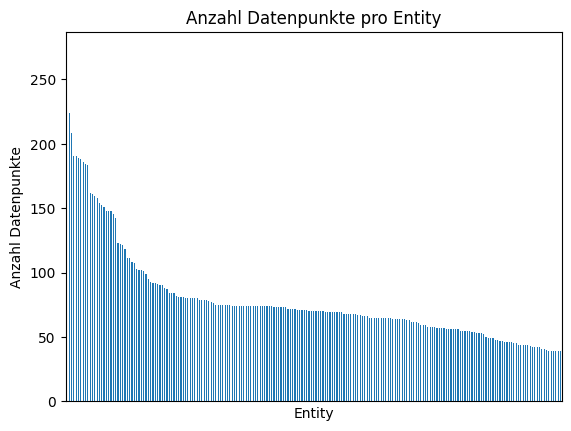

In [36]:
df["Entity"].value_counts().plot(
    kind="bar",
    xticks=[],
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Entity"
)
plt.show()


In [38]:
print("Anzahl verschiedener Codes:", df["Code"].nunique())
df["Code"].value_counts().head(10)


Anzahl verschiedener Codes: 202


Code
SWE         273
OWID_WRL    224
FRA         208
BEL         190
AUT         190
DNK         189
NOR         188
ISL         186
NLD         184
GBR         183
Name: count, dtype: int64

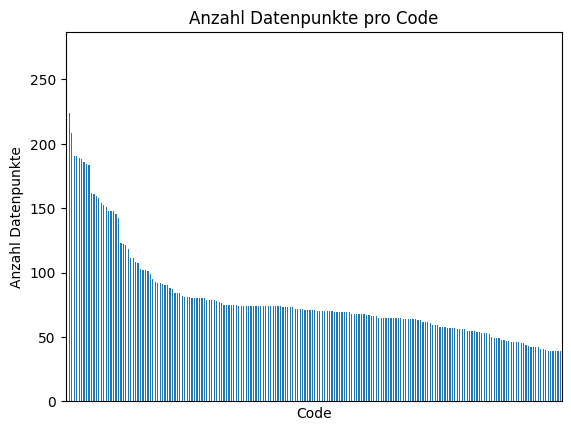

In [40]:
df["Code"].value_counts().plot(
    kind="bar",
    xticks=[],
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Code"
)
plt.show()


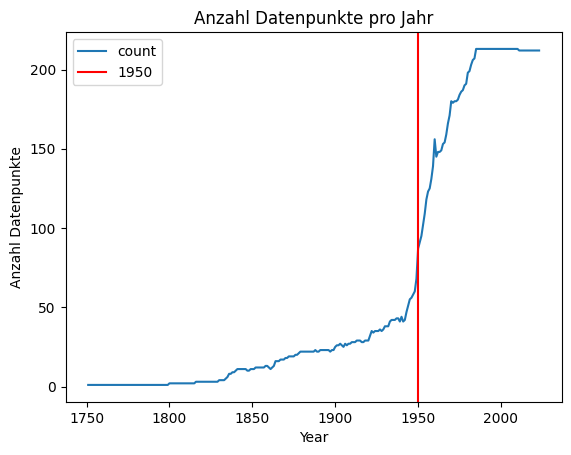

In [42]:
g = df["Year"].value_counts().sort_index().plot(
    ylabel="Anzahl Datenpunkte",
    title="Anzahl Datenpunkte pro Jahr"
)
g.axvline(x=1950, color="red", label="1950")
g.legend()
plt.show()


In [44]:
df[["Year", "Child mortality rate"]].describe()


,Year,Child mortality rate
count,16835.000000,16835.000000
mean,1974.431838,10.726533
std,41.301284,10.787012
min,1751.000000,0.140000
25%,1960.000000,2.160000
50%,1984.000000,6.580000
75%,2004.000000,16.705000
max,2023.000000,76.740000


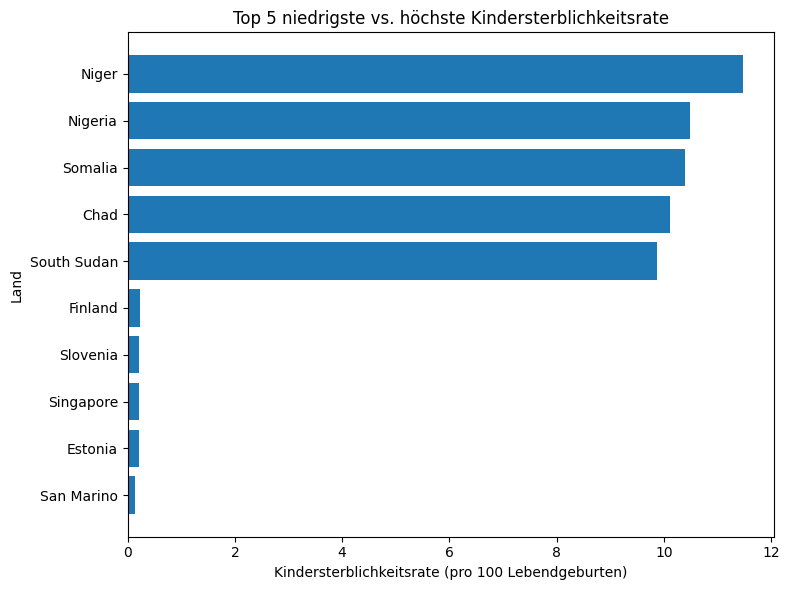

,Entity,Child mortality rate
0,San Marino,0.14
1,Estonia,0.21
2,Singapore,0.21
3,Slovenia,0.22
4,Finland,0.23
9,South Sudan,9.87
8,Chad,10.11
7,Somalia,10.40
6,Nigeria,10.49
5,Niger,11.48


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Sicherheit: fehlende Werte entfernen
df_latest_clean = df_latest.dropna(subset=["Child mortality rate"])

# Top 5 tief & hoch
top_5_low = df_latest_clean.nsmallest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]
top_5_high = df_latest_clean.nlargest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]

# Zusammenführen
compare = pd.concat([top_5_low, top_5_high], ignore_index=True)

# Sortieren für horizontales Diagramm
compare_sorted = compare.sort_values(by="Child mortality rate")

# Plot
plt.figure(figsize=(8,6))
plt.barh(compare_sorted["Entity"], compare_sorted["Child mortality rate"])
plt.xlabel("Kindersterblichkeitsrate (pro 100 Lebendgeburten)")
plt.ylabel("Land")
plt.title("Top 5 niedrigste vs. höchste Kindersterblichkeitsrate")
plt.tight_layout()
plt.show()

compare_sorted



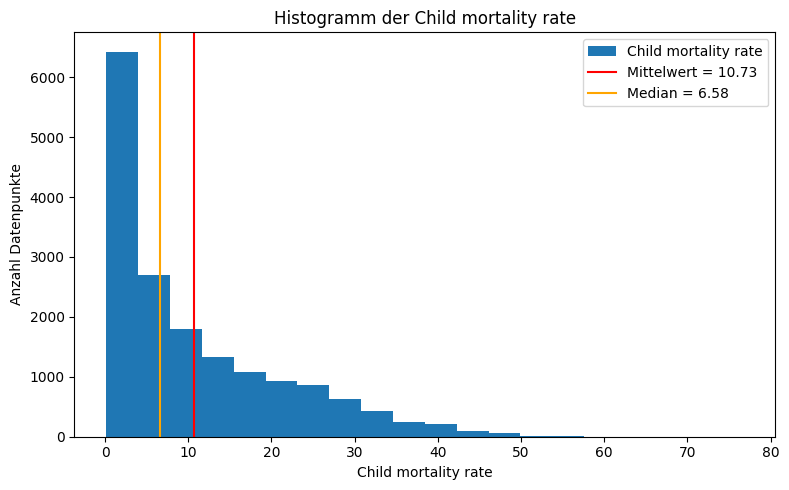

In [46]:
plt.figure(figsize=(8,5))

vals = df["Child mortality rate"].dropna()
plt.hist(vals, bins=20, label="Child mortality rate")

mean_val = vals.mean()
median_val = vals.median()

plt.axvline(mean_val, color="red", label=f"Mittelwert = {mean_val:.2f}")
plt.axvline(median_val, color="orange", label=f"Median = {median_val:.2f}")

plt.xlabel("Child mortality rate")
plt.ylabel("Anzahl Datenpunkte")
plt.title("Histogramm der Child mortality rate")
plt.legend()
plt.tight_layout()
plt.show()


## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



In [47]:
latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year].dropna(subset=["Child mortality rate"])
latest_year


np.int64(2023)

In [48]:
top_5_high = df_latest.nlargest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]
top_5_low  = df_latest.nsmallest(5, "Child mortality rate")[["Entity", "Child mortality rate"]]

top_5_high, top_5_low


(            Entity  Child mortality rate
 10769        Niger                 11.48
 10831      Nigeria                 10.49
 13618      Somalia                 10.40
 2902          Chad                 10.11
 13881  South Sudan                  9.87,
            Entity  Child mortality rate
 12876  San Marino                  0.14
 4645      Estonia                  0.21
 13375   Singapore                  0.21
 13495    Slovenia                  0.22
 5132      Finland                  0.23)

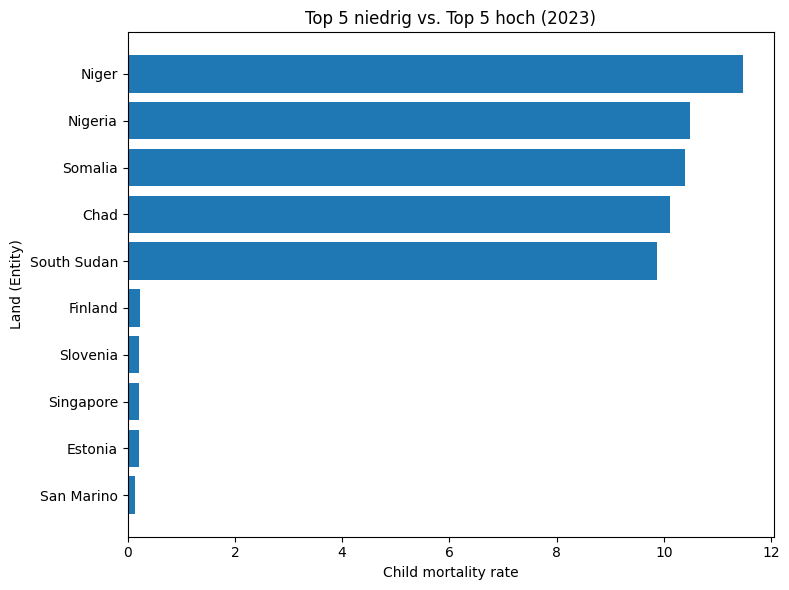

In [49]:
compare = pd.concat([top_5_low, top_5_high], ignore_index=True)
compare_sorted = compare.sort_values("Child mortality rate")

plt.figure(figsize=(8,6))
plt.barh(compare_sorted["Entity"], compare_sorted["Child mortality rate"])
plt.xlabel("Child mortality rate")
plt.ylabel("Land (Entity)")
plt.title(f"Top 5 niedrig vs. Top 5 hoch ({latest_year})")
plt.tight_layout()
plt.show()


Das Diagramm zeigt die fünf Länder mit den niedrigsten sowie die fünf Länder mit den höchsten Werten der Child mortality rate im Jahr 2023. Die Unterschiede sind deutlich sichtbar und zeigen grosse globale Ungleichheiten in Gesundheit, Versorgung und Lebensbedingungen.